# Mapping Economic Disparities and Job Trends: An Analysis of Wages and Industry Growth Across US States

Karina Yang | yjy1114@uw.edu | Data Science Project Report & Code | University of Washington

---
## Summary
---

This project analyzes average weekly wages, annual pay, and job growth and decline across various U.S. regions using datasets from Kaggle and the U.S. Bureau of Labor Statistics. Through interactive visualizations and detailed data analysis, the project reveals significant wage disparities, identifies key factors influencing hiring decisions, and highlights regional economic trends and industry dynamics. The analysis shows that service-oriented industries dominate wage distribution, and regions like the Northeast and West Coast exhibit higher average annual pays compared to the Midwest and Southern regions.

### Reseach Question

**Research Question 1: How do different candidate attributes (such as age, gender, education level, experience, interview scores, and skill scores) influence the likelihood of being hired?**

Higher interview, skill, and personality scores significantly increase the likelihood of being hired. Higher education levels also positively impact hiring decisions, while factors like age, years of experience, and distance from the company have minimal influence.
    
**Research Question 2: Which industries have the highest and lowest total annual wages, and how do service industry sub-sectors contribute to the overall wage distribution?**

Service-oriented industries, manufacturing, and healthcare have the highest total annual wages. Conversely, niche markets such as railroads and one-hour photofinishing have the lowest wages. This highlights the economic dominance of essential goods-producing and service-related industries.
    
**Research Question 3: What are the average annual wages across different states in the USA, and how do these wages vary geographically?**

The District of Columbia, New York, Massachusetts, New Jersey, and California have the highest average annual pays, while Puerto Rico, Mississippi, Arkansas, and South Dakota have the lowest. Higher wages are concentrated in the Northeast and West Coast regions, attributed to higher living costs and diverse economies.

### Data Setting

This research project utilizes two datasets from distinct sources to explore various aspects of hiring decisions and industry employment statistics in the United States.

##### 1. Predicting Hiring Decisions in Recruitment Data
- source: Kaggle
- Link: https://data.census.gov/all?q=Job
- This dataset encompasses detailed information about job candidates and the hiring decisions made by the company. The variables include candidate demographics (age, gender), educational background, professional experience, distance from the company, and various assessment scores (interview, skills, personality). 

##### 2. 2023 Total Industry Employment Statistics
- source: U.S. BUREAU OF LABOR STATISTIC
- link: https://www.bls.gov/cew/downloadable-data-files.htm
- This dataset provides comprehensive employment statistics across various industries in the United States for the year 2023. It includes data on the number of establishments, employment levels, total annual wages, and various economic indicators.

---
## Results and Code
---

The following packages were imported:

In [30]:
!pip install plotly
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

### Reseach Question 1: How do different candidate attributes influence the likelihood of being hired?

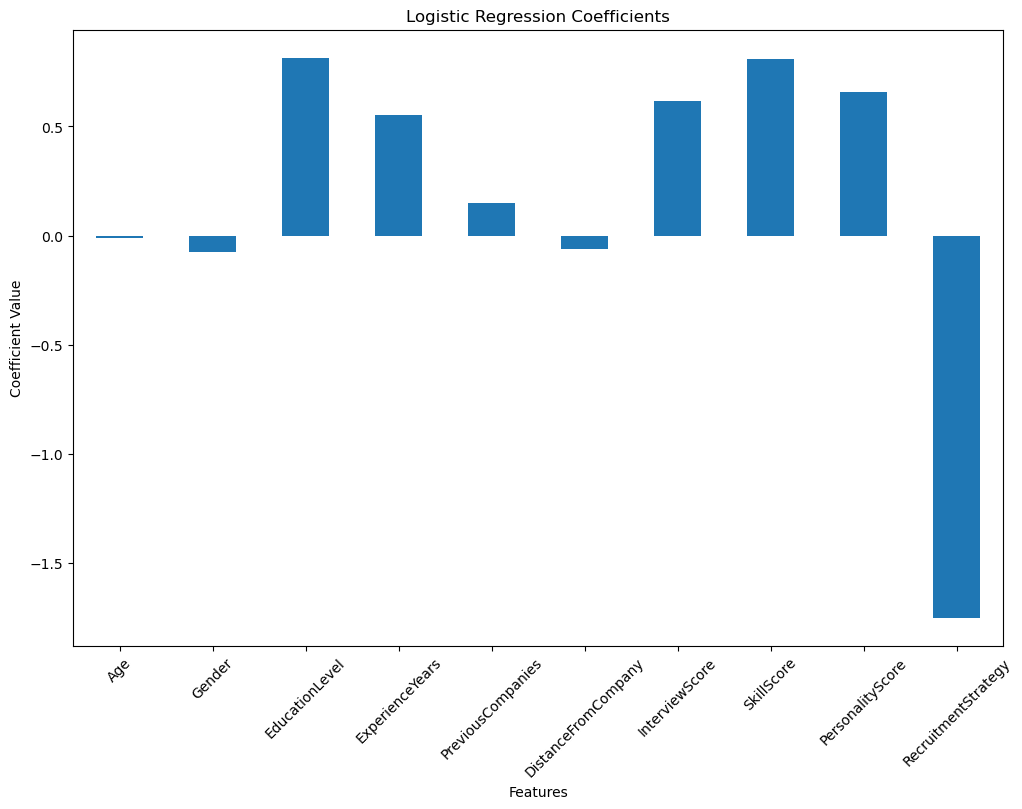

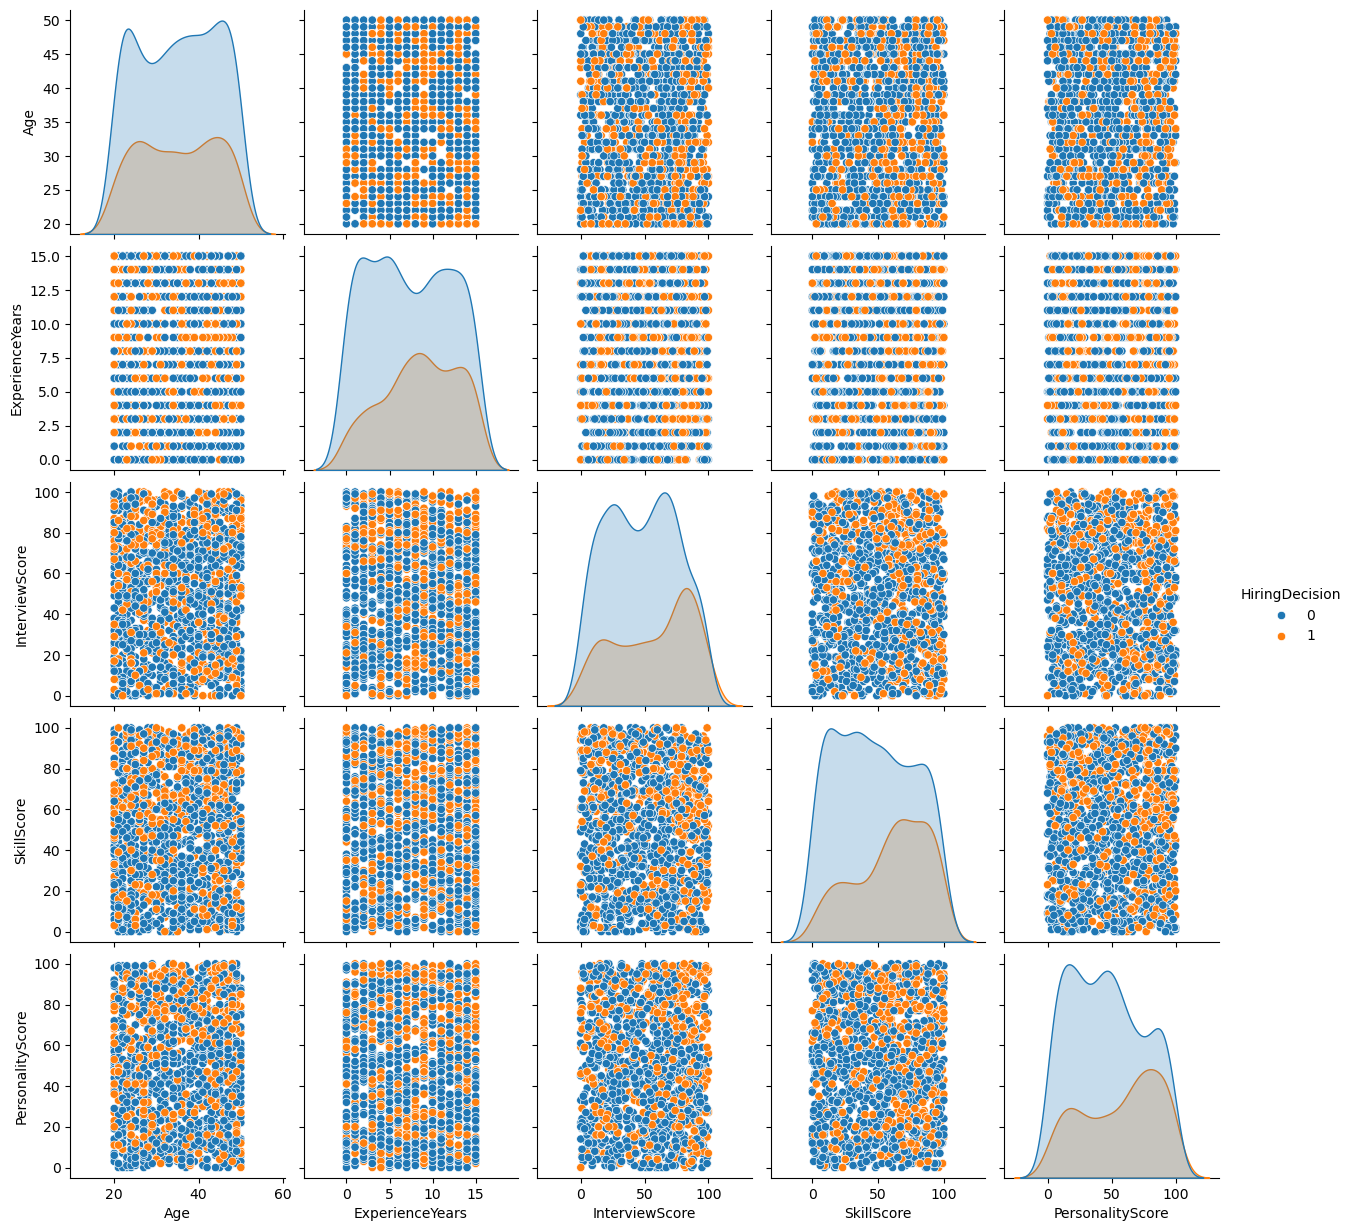

In [31]:
# Load the dataset
df_recruitment = pd.read_csv('recruitment_data.csv', low_memory=False)

X = df_recruitment.drop('HiringDecision', axis=1)
y = df_recruitment['HiringDecision']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_scaled, y)

# Coefficients plot
coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients.plot(kind='bar', figsize=(12, 8))
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.show()

sns.pairplot(df_recruitment, hue='HiringDecision', vars=['Age', 'ExperienceYears', 'InterviewScore', 'SkillScore', 'PersonalityScore'])
plt.show()

Based on the logistic regression coefficients plot, here are some conclusions:

**Interview Score:** This has a significant positive coefficient, indicating that higher interview scores strongly increase the likelihood of being hired.

**Skill Score:** This also has a positive coefficient, though smaller than the interview score. This suggests that skill score is an important factor, but not as influential as the interview score in the hiring decision.

**Personality Score:** This has a positive coefficient, which means better personality scores are associated with higher chances of being hired.

**Education Levels:** The coefficients for EducationLevel_2, EducationLevel_3, and EducationLevel_4 are positive, suggesting that higher education levels increase the likelihood of being hired compared to the baseline category (which might be the lowest education level, depending on how the data was encoded).

**Recruitment Strategy:** The negative coefficients for RecruitmentStrategy_2 and RecruitmentStrategy_3 indicate that candidates sourced through these strategies are less likely to be hired compared to the baseline strategy.

**Gender:** The coefficient for Gender_1 is slightly positive, indicating a slight increase in the likelihood of being hired compared to the baseline gender category.

**Other Factors:** Age, Experience Years, Previous Companies, and Distance from Company: These factors have very small coefficients, suggesting they do not have a strong influence on the hiring decision in this model.

Based on the Pair Plot:

**Age and Hiring Decision:** The distribution of ages shows that candidates of all ages are present, but there's no strong visual indication that age significantly affects the hiring decision directly.

**Experience and Hiring Decision:** The scatter plot between ExperienceYears and HiringDecision indicates a slight tendency where candidates with a few years of experience are both hired and not hired. More years of experience does not show a clear pattern related to hiring.

**InterviewScore, SkillScore, and PersonalityScore:** These plots show that higher interview scores, skill scores, and personality scores have a higher density of orange points (1 - Hired). This suggests that these scores are positively correlated with the likelihood of being hired. Particularly, candidates with higher InterviewScore and SkillScore tend to be hired more frequently.

**Overall Trends:** There is a visible pattern that higher scores in interviews, skills, and personality are associated with a higher probability of being hired.
No strong correlation is observed between the other features such as Age and ExperienceYears with the hiring decision.

**Interesting find:** The logistic regression plot shows that ExperienceYears has a positive coefficient but not pair plot. The possible reasons for different can be logistic regression accounts for the combined effect of all features when determining the impact of ExperienceYears on the hiring decision. The pair plot, on the other hand, looks at relationships in a more isolated manner.

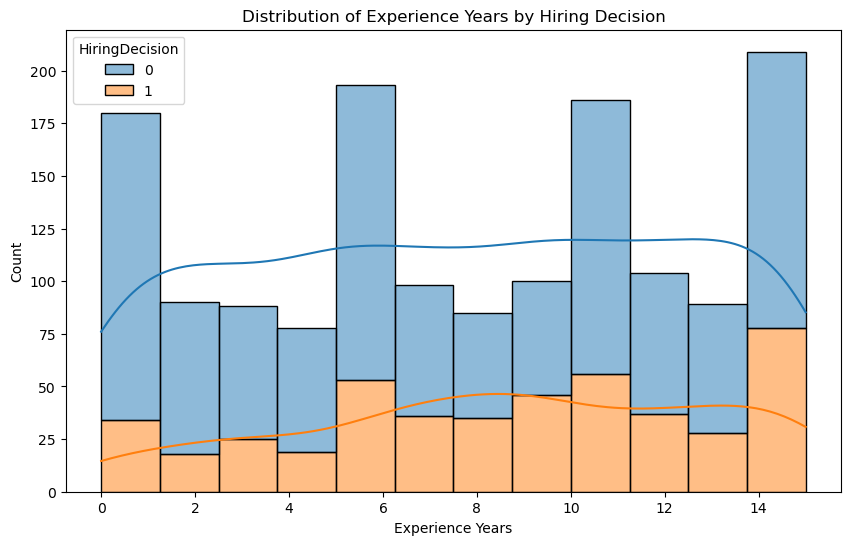

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_recruitment, x='ExperienceYears', hue='HiringDecision', kde=True, multiple='stack')
plt.title('Distribution of Experience Years by Hiring Decision')
plt.xlabel('Experience Years')
plt.ylabel('Count')
plt.show()

The histogram indicates that there are more candidates who are not hired (blue bars) than those who are hired (orange bars) across all experience levels. While experience is important, the hiring decision appears to be influenced by other factors as well, which might include interview scores, skill scores, and other attributes.
The relationship between experience years and hiring decision is more complex than a simple positive correlation and may include interactions with other features.

### Research Question 2:  Which industries have the highest and lowest total annual wages, and how do service industry sub-sectors contribute to the overall wage distribution?

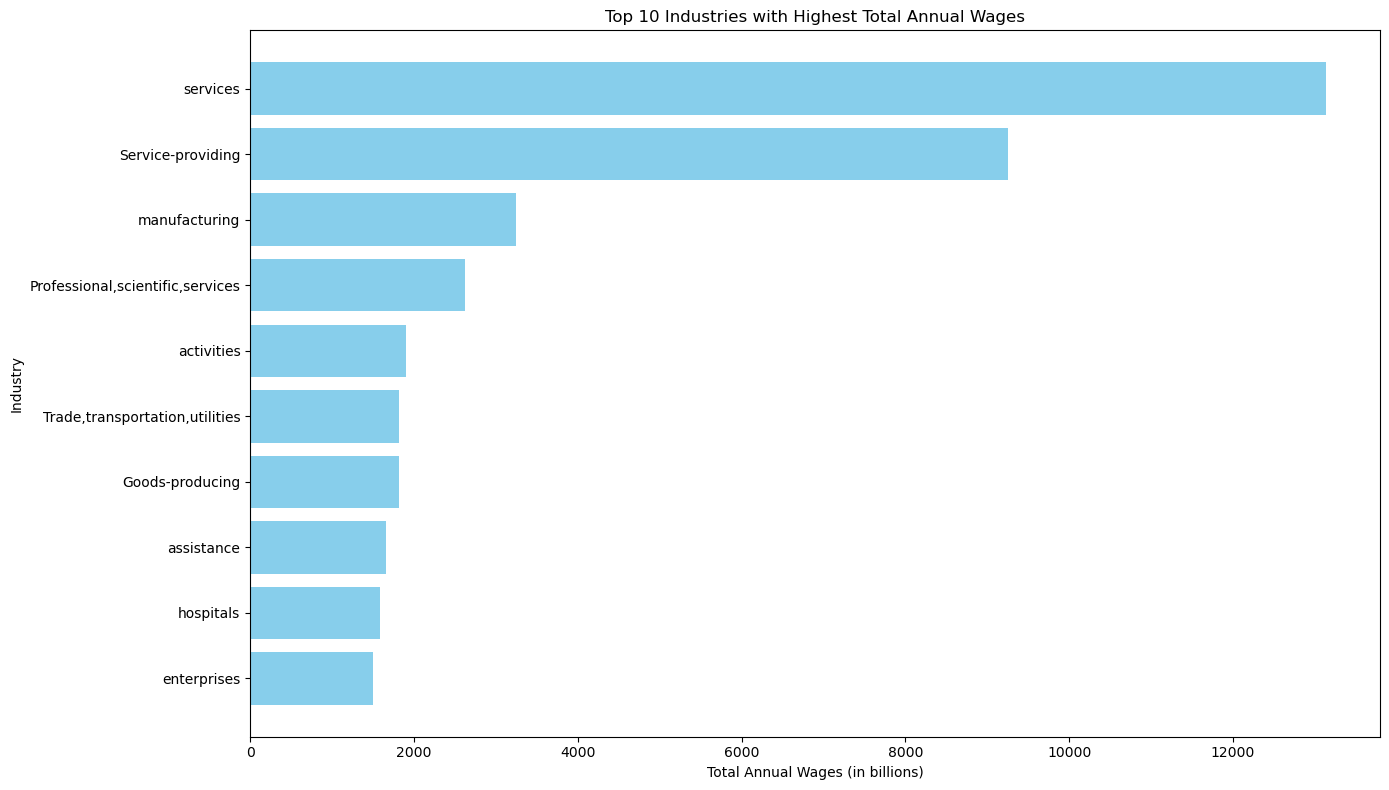

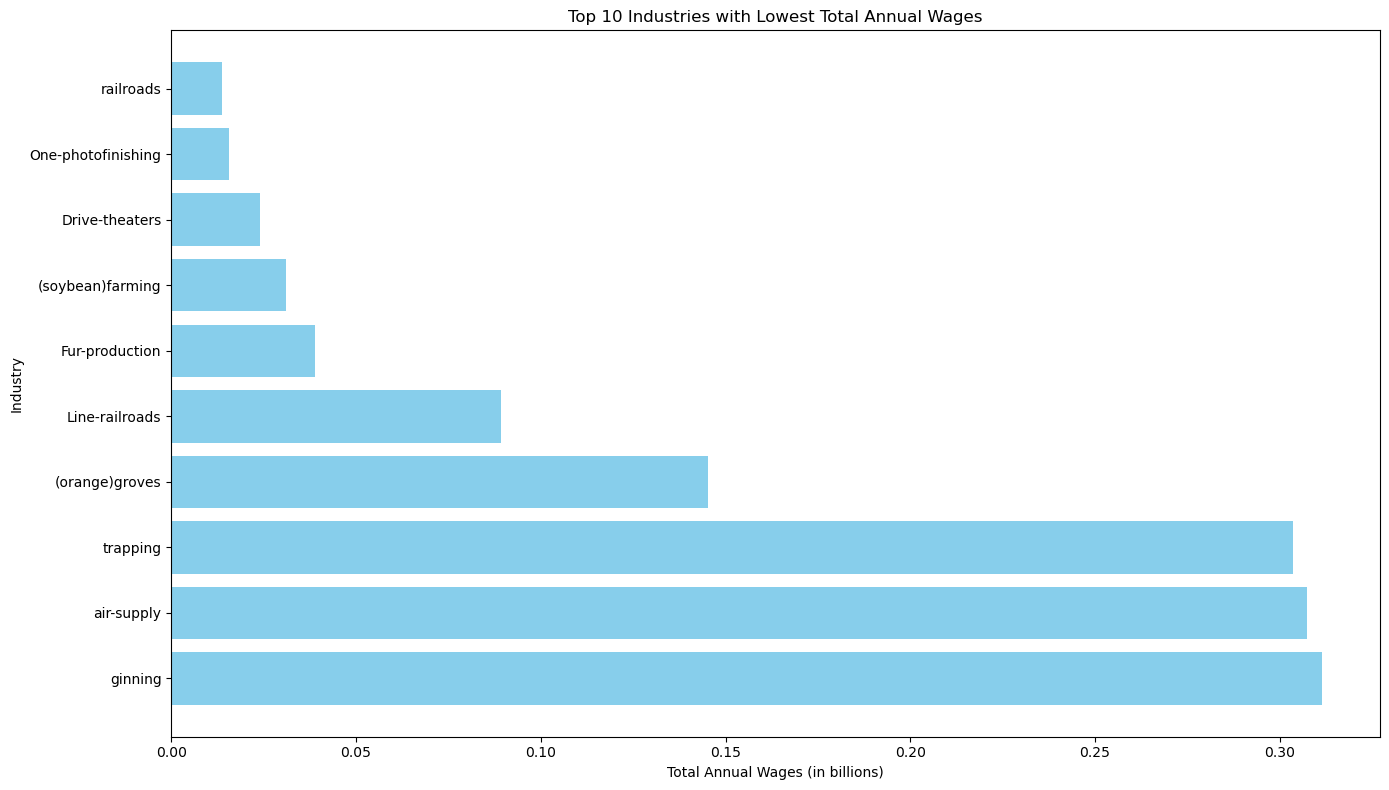

In [33]:
# Load the cleaned dataset
df_industry_updated = pd.read_csv('2023.annual US000 U.S. TOTAL.csv', low_memory=False)
df_industry_filtered = df_industry_updated[df_industry_updated['industry_title'] != '10 Total, all industries'].copy()

def clean_industry_title(title):
    return re.sub(r'^\d+\s|\d+|\w*\s|\w*\.', '', title).strip()
    
df_industry_filtered.loc[:, 'industry_title_clean'] = df_industry_filtered['industry_title'].apply(clean_industry_title)
total_wages_combined_mapped = df_industry_filtered.groupby('industry_title_clean')['total_annual_wages'].sum().reset_index()
total_wages_combined_mapped['total_annual_wages'] = total_wages_combined_mapped['total_annual_wages'] / 1e9

top_10_highest_wages_combined_mapped = total_wages_combined_mapped.nlargest(10, 'total_annual_wages')
top_10_lowest_wages_combined_mapped = total_wages_combined_mapped.nsmallest(10, 'total_annual_wages')

# Create the plot
plt.figure(figsize=(14, 8))
plt.barh(top_10_highest_wages_combined_mapped['industry_title_clean'], top_10_highest_wages_combined_mapped['total_annual_wages'], color='skyblue')
plt.xlabel('Total Annual Wages (in billions)')
plt.ylabel('Industry')
plt.title('Top 10 Industries with Highest Total Annual Wages')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

# Create the plot
plt.figure(figsize=(14, 8))
plt.barh(top_10_lowest_wages_combined_mapped['industry_title_clean'], top_10_lowest_wages_combined_mapped['total_annual_wages'], color='skyblue')
plt.xlabel('Total Annual Wages (in billions)')
plt.ylabel('Industry')
plt.title('Top 10 Industries with Lowest Total Annual Wages')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

The analysis of total annual wages across various industries reveals significant disparities. The top 10 industries with the highest total annual wages, led by the "Services" sector, collectively account for an overwhelming portion of the total wages, reflecting the substantial economic contribution of service-related industries. Notably, "Manufacturing" and "Health Care and Social Assistance" also feature prominently, underscoring their critical roles in the economy. Conversely, the bottom 10 industries, including sectors like "Railroads" and "One-hour photofinishing," represent niche markets with minimal economic impact in terms of total wages. These findings highlight the dominance of service-oriented and essential goods-producing industries in driving wage distribution, while more specialized or outdated sectors contribute relatively minor amounts.


Let's create a plot that shows the total annual wages for the major sub-sectors within the "Services" industry, ensuring we capture all relevant categories:

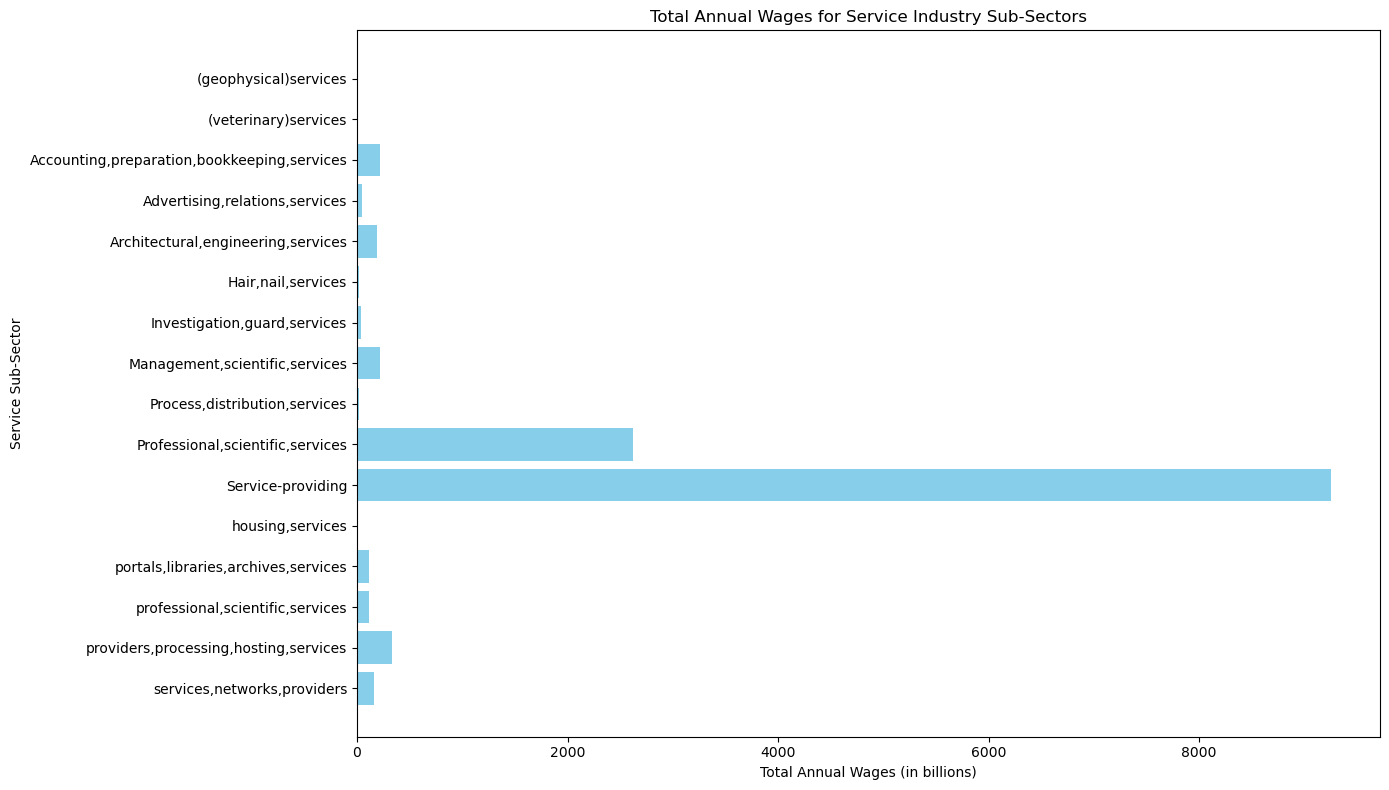

In [34]:
df_industry_filtered = df_industry_updated[df_industry_updated['industry_title'] != '10 Total, all industries'].copy()

def clean_industry_title(title):
    return re.sub(r'^\d+\s|\d+|\w*\s|\w*\.', '', title).strip()

df_industry_filtered['industry_title_clean'] = df_industry_filtered['industry_title'].apply(clean_industry_title)

services_subsectors_df = df_industry_filtered[df_industry_filtered['industry_title_clean'].str.contains('service|Service', case=False)]
services_subsectors_df = services_subsectors_df[~services_subsectors_df['industry_title_clean'].str.lower().isin(['service', 'services'])]

total_wages_services_subsectors = services_subsectors_df.groupby('industry_title_clean')['total_annual_wages'].sum().reset_index()
total_wages_services_subsectors['total_annual_wages'] = total_wages_services_subsectors['total_annual_wages'] / 1e9

# Create the plot
plt.figure(figsize=(14, 8))
plt.barh(total_wages_services_subsectors['industry_title_clean'], total_wages_services_subsectors['total_annual_wages'], color='skyblue')
plt.xlabel('Total Annual Wages (in billions)')
plt.ylabel('Service Sub-Sector')
plt.title('Total Annual Wages for Service Industry Sub-Sectors')
plt.gca().invert_yaxis()  # Highest wages on top
plt.tight_layout()
plt.show()

### Research Question 3: What are the average annual wages across different states in the USA, and how do these wages vary geographically?

In [37]:
pio.renderers.default = 'notebook'

# Load the CSV file with industry data
file_path_geography = '2023.annual 10 10 Total, all industries.csv'
data = pd.read_csv(file_path_geography, low_memory=False)

us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
    'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 
    'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
    'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
    'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
    'West Virginia', 'Wisconsin', 'Wyoming', 'District of Columbia', 'Puerto Rico', 'Guam', 'American Samoa', 
    'U.S. Virgin Islands', 'Northern Mariana Islands'
]

# Function to extract state and county
def extract_location_info(area_title):
    for state in us_states:
        if state in area_title:
            parts = area_title.split(', ')
            if len(parts) > 1:
                county = parts[0].strip()
                return county, state
            else:
                return None, state
    return None, None

# Apply the function to the dataframe
data['county'], data['state'] = zip(*data['area_title'].apply(extract_location_info))

# Filter out rows where county or state is None
cleaned_data = data.dropna(subset=['state'])

# Save the cleaned dataset
cleaned_data.to_csv('cleaned_us_geography_data.csv', index=False)

In [38]:
pio.renderers.default = 'iframe'

# Load the cleaned dataset
cleaned_data_path = 'cleaned_us_geography_data.csv'
cleaned_data = pd.read_csv(cleaned_data_path, low_memory=False)

# Assuming 'avg_annual_pay' is the column that indicates the annual pay
# Ensure the 'avg_annual_pay' column is numeric
cleaned_data['avg_annual_pay'] = pd.to_numeric(cleaned_data['avg_annual_pay'], errors='coerce')

state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'Puerto Rico': 'PR'
}
# Map state names to abbreviations
cleaned_data['state'] = cleaned_data['state'].map(state_abbrev).fillna(cleaned_data['state'])

# Aggregate the data to get the average annual pay per state
state_annual_pay = cleaned_data.groupby('state')['avg_annual_pay'].mean().reset_index()

# Print the statistics of avg_annual_pay
print(state_annual_pay['avg_annual_pay'].describe())

# Create the map
fig = px.choropleth(
    state_annual_pay,
    locations='state',
    locationmode='USA-states',
    color='avg_annual_pay',
    scope="usa",
    title="Average Annual Pay by State",
    color_continuous_scale=px.colors.sequential.Turbo,
    labels={'avg_annual_pay': 'Avg Annual Pay ($)'},
    range_color=(state_annual_pay['avg_annual_pay'].min(), state_annual_pay['avg_annual_pay'].max())
)

fig.show()

count        51.000000
mean      60126.497457
std       14028.549168
min       37543.924051
25%       53402.028296
50%       57041.099688
75%       64123.005613
max      136175.307692
Name: avg_annual_pay, dtype: float64


The map and data analysis reveal significant variations in average annual pay across the United States. Here are some key observations:

**Highest Annual Pay:** The District of Columbia has the highest average annual pay at approximately 136,175. States like New York, Massachusetts, New Jersey, and California also exhibit higher average annual pays, generally above 70,000.

**Lowest Annual Pay:** Puerto Rico shows the lowest average annual pay at approximately 37,544. Other states with relatively lower average annual pays include Mississippi, Arkansas, and South Dakota, all below 50,000.

**Regional Trends:** The Northeast and West Coast regions tend to have higher average annual pays compared to the Midwest and Southern regions. This can be attributed to the higher cost of living, economic activities, and industrial presence in these regions.

**Economic Implications:** States with higher average annual pays tend to have a more diversified and advanced economy with significant contributions from sectors such as technology, finance, and government. States with lower average annual pays might rely more on agriculture, manufacturing, and lower-wage service industries.

**Policy Implications:** States with lower average annual pays could benefit from targeted economic development programs aimed at attracting higher-paying industries and improving educational and training opportunities. Policymakers in high-cost states might need to consider cost-of-living adjustments to ensure residents can maintain a reasonable standard of living.

---
## Impact and Limitations
---

Analysis of average annual wages, industry wages, and job growth across various states in the USA provides valuable insights into economic disparities and industry trends. The visualizations and analysis highlight the significant variations in average annual pay across states, showcasing regions with the highest and lowest wages. This information can be critical for policymakers and stakeholders in understanding regional economic strengths and weaknesses, and in making informed decisions regarding economic development and resource allocation. By identifying industries with the highest and lowest total annual wages and analyzing service industry sub-sectors, our study sheds light on the dominant and underperforming sectors. This can guide workforce development programs, investment strategies, and policy formulations aimed at boosting industries with potential growth and addressing challenges in struggling sectors. The geographic analysis of wages provides a visual representation of wage disparities across the United States. This can help identify regions that require economic interventions and support, ensuring more equitable economic growth and development across the country.

This study has several limitations that need to be acknowledged, which could affect the interpretation and generalizability of the findings. This analysis heavily depends on datasets from the Bureau of Labor Statistics and other singular sources. This introduces inherent biases and limitations. For instance, the data may suffer from response bias, where certain demographics and cultures are underrepresented or misrepresented due to social desirability bias or non-response issues. The graphical representation of data can sometimes lead to skewed interpretations. For example, adjusting axes for closer visual inspections may unintentionally misinform viewers. It’s crucial for the audience to critically evaluate the visualizations, considering potential distortions and the context provided by the accompanying analysis.

While my study offers valuable insights into wage disparities and industry trends across the United States, it is essential to recognize these limitations. Future research could address these issues by incorporating more diverse data sources, longitudinal analyses, and a broader range of socioeconomic factors to provide a more comprehensive and nuanced understanding of the economic dynamics at play.